Project Done by
Neer Pathak 
1. To predict the loss of generation if the turbine were working properly.
2. To check the particular season when particular type of failure happens the most. 

##### Description <br>
Gen. Date =	Date <br>
MW	= Turbine capacity <br>
Loc. No. =	Turbine id <br>
Gen. (kwh) DAY =	Generation on that day <br>
Gen. (kwh) MTD =	Cumulative generation till date in that month <br>
Gen. (kwh) YTD =	Cumulative generation till date in that year <br>
%PLF DAY =	PLF stands for plant load factor <br>
M/C Avail.% =	The percent of 24 hrs when machine was not down. <br>
GF =	Grid failure hours <br>
FM =	Machine downtime corresponding to cause 'FM' <br>
S =	Machine downtime corresponding to cause 'S' <br>
U =	Machine downtime corresponding to cause 'U' <br>
NOR =	Machine downtime corresponding to cause 'NOR' <br>
Gen Hrs. =	The actual hours when the machine was generating. <br>
Opr Hrs. =	The actual hours when the machine was available for operation. This should be in normal case 24 - sum (GF,FM,…NOR)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/neerx/Desktop/DAE Assignmnet/genclean2.csv", parse_dates = True, index_col = ('Gen. Date'))

In [3]:
data.dropna(axis=0,how = 'any')

,MW,Loc. No.,Gen. (kwh) DAY,Gen. (kwh) MTD,Gen. (kwh) YTD,%PLF DAY,%PLF MTD,%PLF YTD,M/C Avail.%,GF,FM,S,U,NOR,Gen Hrs.,Opr Hrs.,FY
Gen. Date,,,,,,,,,,,,,,,,,
2019-04-01,1.25,K410,6884.0,6884.0,6884.0,22.95,0.76,0.06,100.0,0.0,0.0,0.0,0.0,0.0,21.1,24.0,19-20
2019-04-02,1.25,K410,4781.0,11665.0,11665.0,15.94,1.30,0.11,100.0,0.0,0.0,0.0,0.0,0.0,19.4,24.0,19-20
2019-04-03,1.25,K410,4714.0,16379.0,16379.0,15.71,1.82,0.15,100.0,0.0,0.0,0.0,0.0,0.0,17.3,24.0,19-20
2019-04-04,1.25,K410,4136.0,20515.0,20515.0,13.79,2.28,0.19,100.0,0.0,0.0,0.0,0.0,0.0,17.2,24.0,19-20
2019-04-05,1.25,K410,8783.0,29298.0,29298.0,29.28,3.26,0.27,100.0,0.0,0.0,0.0,0.0,0.0,21.2,24.0,19-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-06,0.60,P31,10.0,10.0,454682.0,0.07,0.00,8.65,100.0,0.0,22.9,0.0,0.0,0.0,0.6,1.1,20-21
2020-09-03,1.25,K410,1193.0,7682.0,1020791.0,3.98,0.85,9.32,100.0,0.0,0.0,0.0,0.0,0.0,15.9,24.0,20-21
2020-09-04,1.25,K410,646.0,8328.0,1021437.0,2.15,0.93,9.33,100.0,0.2,0.0,0.0,0.0,0.0,4.7,23.8,20-21


In [4]:
data.corr()

,MW,Gen. (kwh) DAY,Gen. (kwh) MTD,Gen. (kwh) YTD,%PLF DAY,%PLF MTD,%PLF YTD,M/C Avail.%,GF,FM,S,U,NOR,Gen Hrs.,Opr Hrs.
MW,1.000000,0.193594,0.224283,0.397980,-0.156985,-0.128942,-0.108231,-0.137984,-0.099883,0.049538,-0.016241,0.147254,-0.031460,-0.225311,-0.118108
Gen. (kwh) DAY,0.193594,1.000000,0.511218,-0.226281,0.888409,0.418408,-0.271284,0.173457,-0.036161,-0.095597,-0.049169,-0.166259,0.001696,0.577759,0.202426
Gen. (kwh) MTD,0.224283,0.511218,1.000000,-0.126473,0.399633,0.890092,-0.190265,-0.081555,-0.017530,-0.005675,-0.039806,0.089112,-0.021852,0.214381,-0.060797
Gen. (kwh) YTD,0.397980,-0.226281,-0.126473,1.000000,-0.316704,-0.226625,0.812936,-0.144474,-0.046027,-0.072743,0.051526,0.140934,-0.015043,-0.311851,-0.069605
%PLF DAY,-0.156985,0.888409,0.399633,-0.316704,1.000000,0.472787,-0.197888,0.204137,-0.000814,-0.120316,-0.051059,-0.196978,0.018220,0.647790,0.230861
%PLF MTD,-0.128942,0.418408,0.890092,-0.226625,0.472787,1.000000,-0.113302,-0.019136,0.013920,-0.024263,-0.034990,0.024705,-0.022030,0.291680,-0.006566
%PLF YTD,-0.108231,-0.271284,-0.190265,0.812936,-0.197888,-0.113302,1.000000,-0.063333,-0.014327,-0.101329,0.071615,0.052090,-0.000828,-0.161941,0.007789
M/C Avail.%,-0.137984,0.173457,-0.081555,-0.144474,0.204137,-0.019136,-0.063333,1.000000,-0.082352,0.055803,-0.098234,-0.984977,0.006353,0.504363,0.814242
GF,-0.099883,-0.036161,-0.017530,-0.046027,-0.000814,0.013920,-0.014327,-0.082352,1.000000,-0.005019,-0.019641,0.022767,-0.004632,-0.153978,-0.279453
FM,0.049538,-0.095597,-0.005675,-0.072743,-0.120316,-0.024263,-0.101329,0.055803,-0.005019,1.000000,-0.018472,-0.056012,-0.005593,-0.295836,-0.482755


In [5]:
#setting target values to predict
pre = ['Gen. (kwh) DAY']
y = data[pre]

In [6]:
features = ['MW' ,'GF', 'FM', 'S', 'U', 'NOR', 'Gen Hrs.','M/C Avail.%','%PLF DAY' ]
x = data[features]

In [7]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

train_x, val_x, train_y, val_y = train_test_split (x,y,random_state=0)

In [8]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor (random_state=1)
forest_model.fit(train_x,train_y)
for_preds = forest_model.predict(val_x)
print (mean_absolute_error(val_y,for_preds))


<ipython-input-8-ee74fd72ddf3>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(train_x,train_y)


12.87451539278129


## To determine particular season for rate of failure

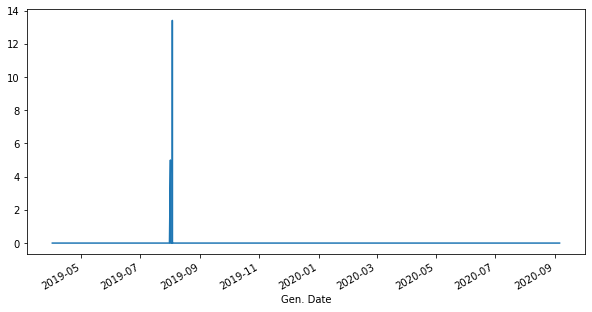

In [9]:
g1 = data['NOR'].plot(figsize = (10,5))

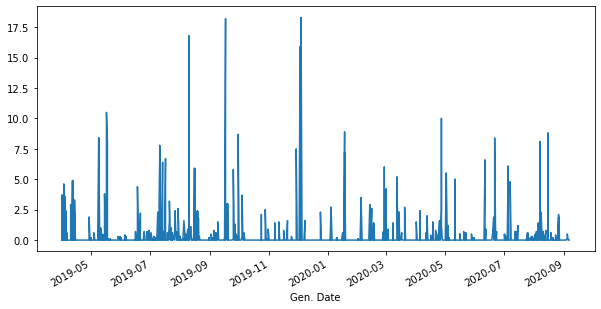

In [10]:
g1 = data['GF'].plot(figsize = (10,5))

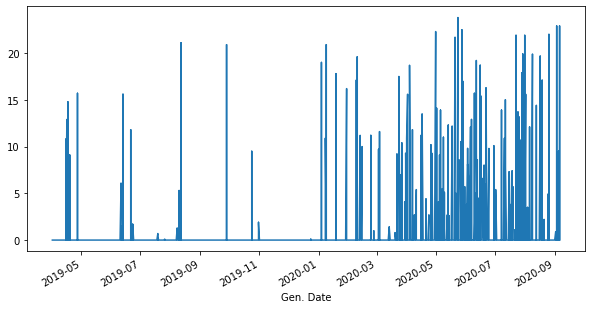

In [24]:
g1 = data['FM'].plot(figsize = (10,5))

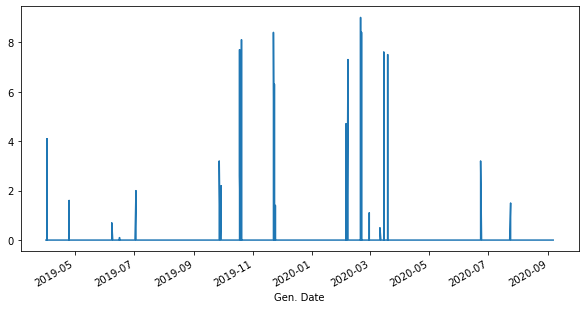

In [25]:
g1 = data['S'].plot(figsize = (10,5))

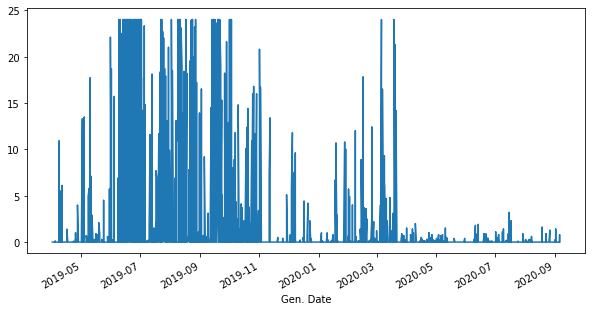

In [26]:
g1 = data['U'].plot(figsize = (10,5))

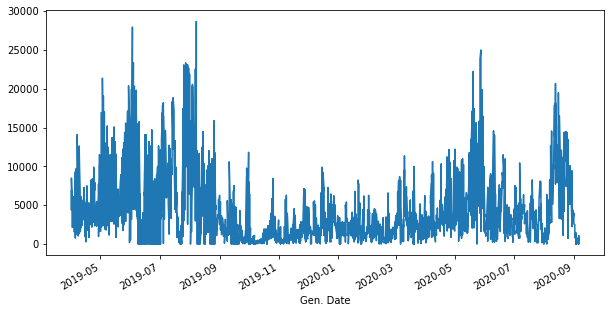

In [28]:
g1 = data['Gen. (kwh) DAY'].plot(figsize = (10,5))

In [11]:
# for prediction 
# input_list = [[x,y,z,p,q]]
# output_pred = forest_model.predict(input_list)
# print(output_pred)

In [12]:
failure_data = data.copy()

In [13]:
failure_data = failure_data.loc[~((failure_data['GF'] == 0) & (failure_data['FM'] == 0) & (failure_data['S'] == 0) & (failure_data['U'] == 0) & (failure_data['NOR'] == 0))]

In [14]:
failure_data

,MW,Loc. No.,Gen. (kwh) DAY,Gen. (kwh) MTD,Gen. (kwh) YTD,%PLF DAY,%PLF MTD,%PLF YTD,M/C Avail.%,GF,FM,S,U,NOR,Gen Hrs.,Opr Hrs.,FY
Gen. Date,,,,,,,,,,,,,,,,,
2019-04-14,1.25,K410,7301.0,98550.0,98550.0,24.34,10.95,0.90,100.00,2.2,0.0,0.0,0.0,0.0,16.2,21.8,19-20
2019-04-15,1.25,K410,3579.0,102129.0,102129.0,11.93,11.35,0.93,100.00,0.0,1.1,0.0,0.0,0.0,12.7,22.9,19-20
2019-04-16,1.25,K410,2668.0,104797.0,104797.0,8.89,11.64,0.96,94.17,0.0,0.0,0.0,1.4,0.0,13.7,22.6,19-20
2019-04-23,1.25,K410,7705.0,143636.0,143636.0,25.68,15.96,1.31,99.58,0.0,0.0,0.0,0.1,0.0,15.8,23.9,19-20
2019-04-25,1.25,K410,7936.0,161227.0,161227.0,26.45,17.91,1.47,93.33,0.0,0.0,1.6,0.0,0.0,19.5,22.4,19-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-04,0.60,P30,312.0,3849.0,594477.0,2.17,0.89,11.31,100.00,0.5,0.0,0.0,0.0,0.0,8.8,23.5,20-21
2020-09-05,1.25,K418,270.0,6088.0,1024075.0,0.90,0.68,9.35,100.00,0.0,9.5,0.0,0.0,0.0,3.7,14.5,20-21
2020-09-06,1.25,K418,604.0,6692.0,1024679.0,2.01,0.74,9.36,96.67,0.0,0.0,0.0,0.8,0.0,6.9,23.2,20-21


## new model for predicting generation on failure days

In [15]:
new1 = failure_data.copy()

In [16]:
for ind in new1.index:
    new1['Gen Hrs.'][ind] = new1['Gen Hrs.'][ind] + new1['GF'][ind] +  new1['FM'][ind] +  new1['S'][ind]+  new1['U'][ind]+  new1['NOR'][ind]
    
    new1['M/C Avail.%'][ind] = 100.0
    new1['GF'][ind] = 0.0
    new1['FM'][ind] = 0.0
    new1['S'][ind] = 0.0
    new1['U'][ind] = 0.0
    new1['NOR'][ind] = 0.0


<ipython-input-16-d7e27fc7c5b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new1['Gen Hrs.'][ind] = new1['Gen Hrs.'][ind] + new1['GF'][ind] +  new1['FM'][ind] +  new1['S'][ind]+  new1['U'][ind]+  new1['NOR'][ind]
<ipython-input-16-d7e27fc7c5b6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new1['M/C Avail.%'][ind] = 100.0
<ipython-input-16-d7e27fc7c5b6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new1['GF'][ind] = 0.0
<ipy

In [17]:
new1

,MW,Loc. No.,Gen. (kwh) DAY,Gen. (kwh) MTD,Gen. (kwh) YTD,%PLF DAY,%PLF MTD,%PLF YTD,M/C Avail.%,GF,FM,S,U,NOR,Gen Hrs.,Opr Hrs.,FY
Gen. Date,,,,,,,,,,,,,,,,,
2019-04-14,1.25,K410,7301.0,98550.0,98550.0,24.34,10.95,0.90,100.0,0.0,0.0,0.0,0.0,0.0,18.4,21.8,19-20
2019-04-15,1.25,K410,3579.0,102129.0,102129.0,11.93,11.35,0.93,100.0,0.0,0.0,0.0,0.0,0.0,13.8,22.9,19-20
2019-04-16,1.25,K410,2668.0,104797.0,104797.0,8.89,11.64,0.96,100.0,0.0,0.0,0.0,0.0,0.0,15.1,22.6,19-20
2019-04-23,1.25,K410,7705.0,143636.0,143636.0,25.68,15.96,1.31,100.0,0.0,0.0,0.0,0.0,0.0,15.9,23.9,19-20
2019-04-25,1.25,K410,7936.0,161227.0,161227.0,26.45,17.91,1.47,100.0,0.0,0.0,0.0,0.0,0.0,21.1,22.4,19-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-04,0.60,P30,312.0,3849.0,594477.0,2.17,0.89,11.31,100.0,0.0,0.0,0.0,0.0,0.0,9.3,23.5,20-21
2020-09-05,1.25,K418,270.0,6088.0,1024075.0,0.90,0.68,9.35,100.0,0.0,0.0,0.0,0.0,0.0,13.2,14.5,20-21
2020-09-06,1.25,K418,604.0,6692.0,1024679.0,2.01,0.74,9.36,100.0,0.0,0.0,0.0,0.0,0.0,7.7,23.2,20-21


In [18]:
features1 = ['MW' ,'GF', 'FM', 'S', 'U', 'NOR', 'Gen Hrs.','M/C Avail.%','%PLF DAY' ]
x1 = new1[features]

pre1 = forest_model.predict(x1)
print(pre1)



[7.30344000e+03 3.57954000e+03 2.65998000e+03 7.70566000e+03
 7.93831000e+03 2.84470000e+03 7.26254000e+03 1.95519700e+04
 6.30686000e+03 1.13038800e+04 1.08507800e+04 7.64695000e+03
 8.26033000e+03 8.93696000e+03 1.08309200e+04 1.18790400e+04
 5.91508000e+03 7.71745000e+03 8.15061000e+03 1.06450300e+04
 1.55706400e+04 1.32259700e+04 3.86383000e+03 2.53122000e+03
 1.16051800e+04 1.29115500e+04 1.26813700e+04 9.88207000e+03
 5.91508000e+03 3.90970000e+03 4.29810000e+02 4.58992000e+03
 1.74229000e+04 2.30107400e+04 2.01015700e+04 2.12553300e+04
 2.29823700e+04 2.27127200e+04 1.49807200e+04 1.57424000e+04
 2.05000600e+04 1.40158100e+04 1.79116667e+01 1.79116667e+01
 1.79116667e+01 1.79116667e+01 2.04924000e+03 3.72142000e+03
 1.79116667e+01 1.79116667e+01 1.23930000e+03 1.00954800e+04
 9.23543000e+03 1.79116667e+01 1.79116667e+01 1.79116667e+01
 2.28116667e+01 1.79116667e+01 1.79116667e+01 1.07895000e+03
 5.08972000e+03 2.51557000e+03 1.80033000e+03 2.10585000e+03
 1.51668000e+03 1.635880

In [19]:
pre1.shape

(914,)

In [20]:
failure_data.shape

(914, 17)

In [21]:
loss = pre1 - failure_data['Gen. (kwh) DAY']

In [22]:
print(loss)

Gen. Date
2019-04-14     2.440
2019-04-15     0.540
2019-04-16    -8.020
2019-04-23     0.660
2019-04-25     2.310
               ...  
2020-09-04    -0.260
2020-09-05    -2.620
2020-09-06    -6.260
2020-09-06    12.555
2020-09-04    -2.350
Name: Gen. (kwh) DAY, Length: 914, dtype: float64


In [23]:
loss.sum(axis = 0)

942.6590000000086